# 前処理

In [1]:
import pandas as pd
#データ取得
df_orig = pd.read_csv("../../data/train.csv").drop("Unnamed: 0", axis=1).dropna()
#データ分割
df_eco = df_orig.query('Class == "Eco"')
df_eco_plus = df_orig.query('Class == "Eco Plus"')
df_business= df_orig.query('Class == "Business"')
#データ数削減
df_eco_new = df_eco.sample(n=11500, random_state=42)
df_business_new = df_business.sample(n=11500, random_state=42)
#データを結合
df = pd.concat([df_eco_new, df_business_new, df_eco_plus], axis=0)
#クラスの割合を確認
df["Class"].value_counts()

Class
Eco         11500
Business    11500
Eco Plus     7468
Name: count, dtype: int64

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
85208,123908,Female,Loyal Customer,69,Personal Travel,Eco,546,2,5,2,...,4,4,2,4,4,4,2,0,0.0,neutral or dissatisfied
31633,107130,Male,Loyal Customer,31,Personal Travel,Eco,842,3,5,3,...,1,4,3,5,5,4,1,35,16.0,neutral or dissatisfied
10425,69734,Female,Loyal Customer,62,Personal Travel,Eco,1372,3,4,2,...,1,1,2,1,3,1,4,0,0.0,neutral or dissatisfied
64557,99343,Female,disloyal Customer,41,Business travel,Eco,1771,3,3,3,...,2,4,4,2,3,4,2,20,23.0,neutral or dissatisfied
41909,59999,Female,Loyal Customer,18,Personal Travel,Eco,937,2,5,2,...,1,5,2,2,1,1,1,0,0.0,neutral or dissatisfied


# 調査
全席クラスに対して、クラスタリングせずに、各満足度を可視化、調査

In [4]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

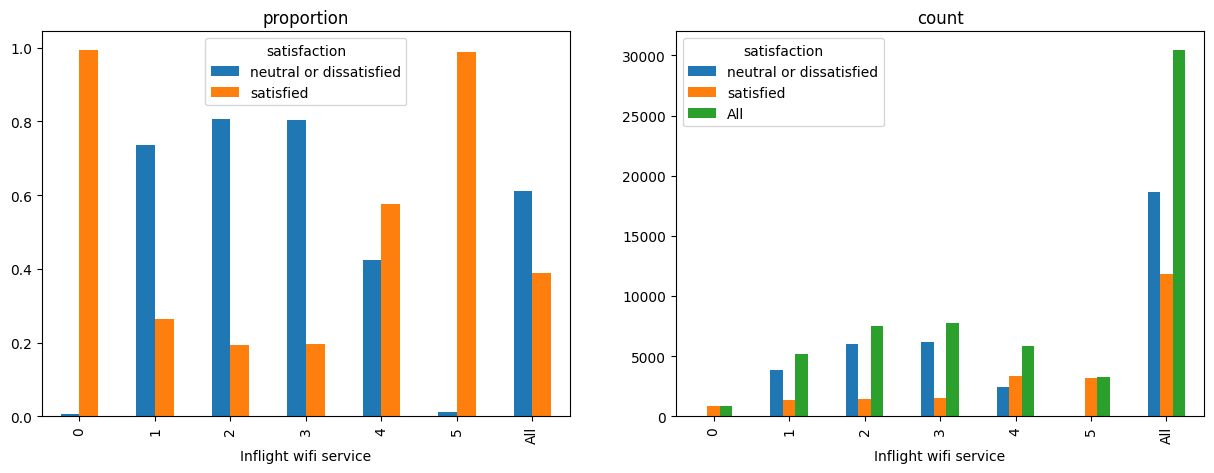

In [5]:
#Inflight wifi service
feat="Inflight wifi service"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

データ全体に対してもInflight wifi serviceとtotal satisfactionに正の関係がある。\
一般的にInflight wifi serviceには力を入れたほうがいいかもしれない

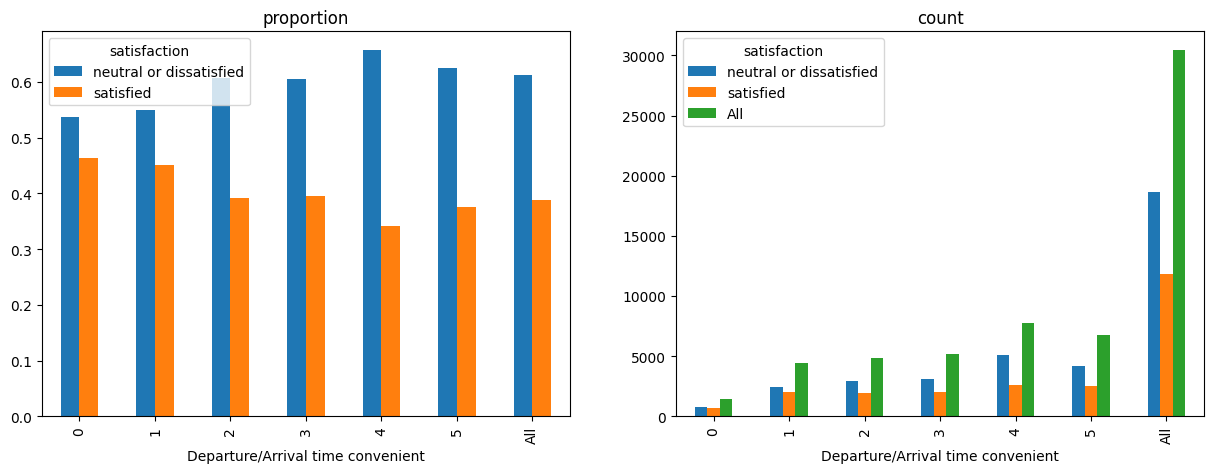

In [6]:
#Departure/Arrival time convenient
feat="Departure/Arrival time convenient"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

正の影響はみられない

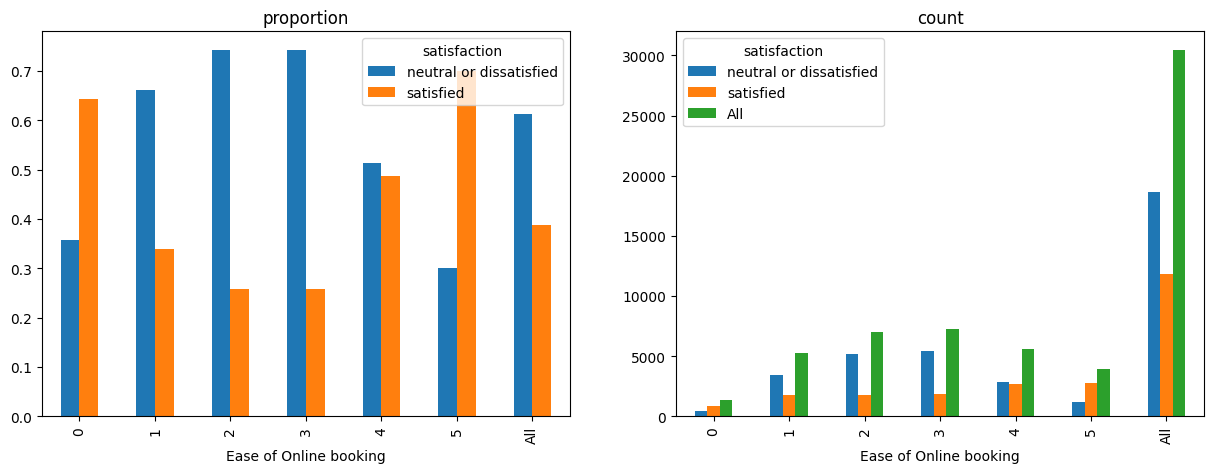

In [7]:
#Ease of Online booking
feat="Ease of Online booking"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

若干正の影響が見られる

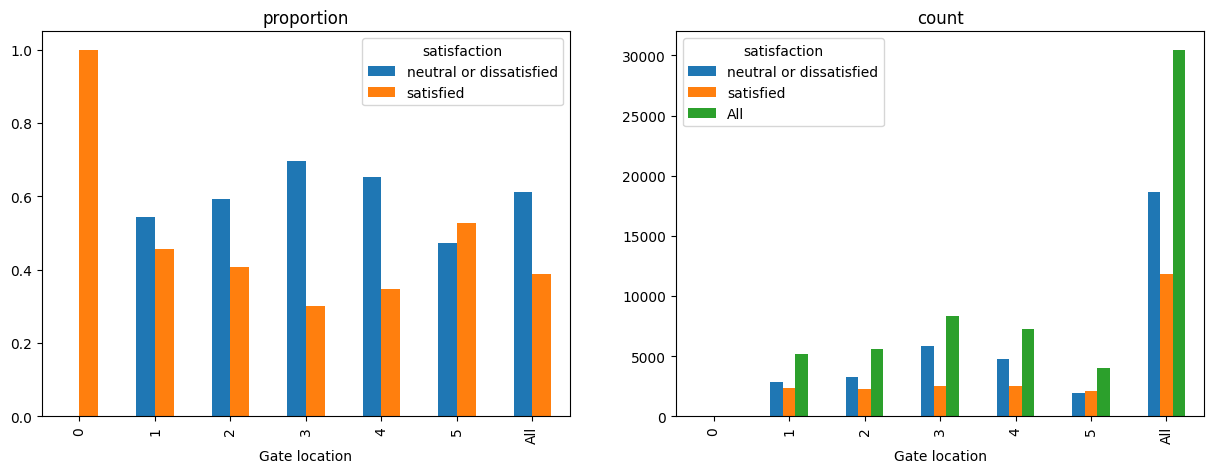

In [10]:
#Gate location
feat="Gate location"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

正の影響はいまいち見られない

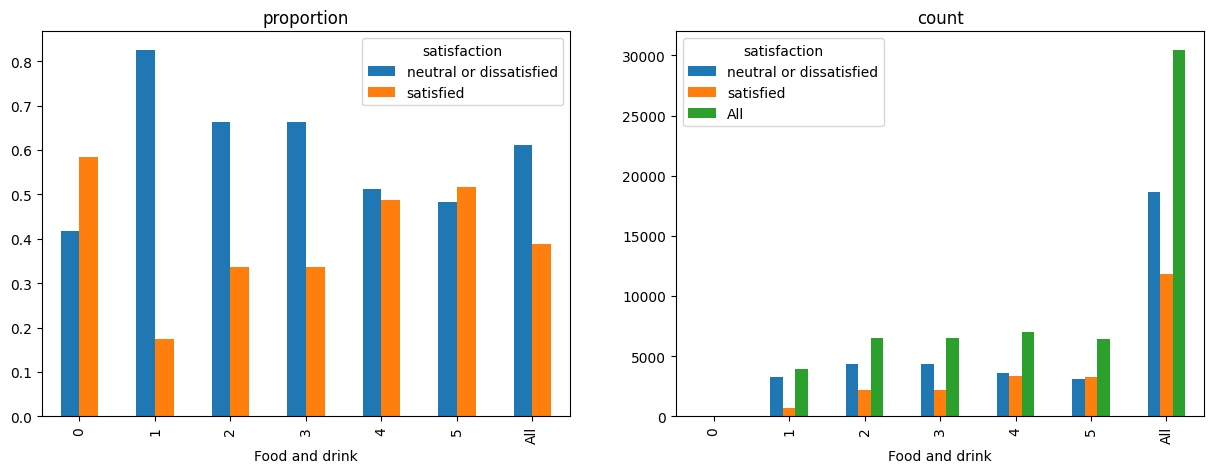

In [11]:
#Food and drink
feat="Food and drink"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

正の影響が見られるが、影響力はそこまでなさそう

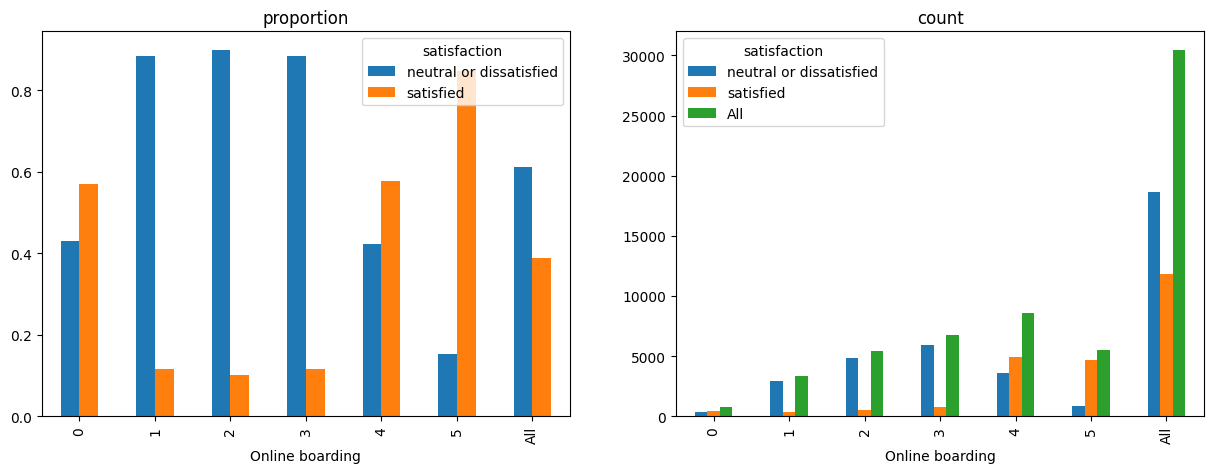

In [12]:
#Online boarding
feat="Online boarding"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

正の影響力が見られる、ただし、4, 5の絶対数が多いため、キャンペーンによる効果は少ない?

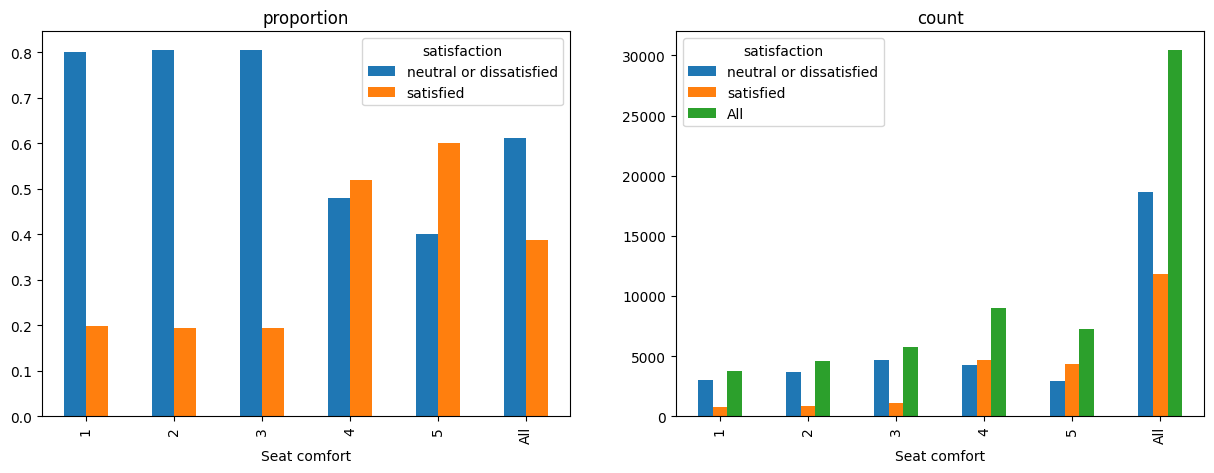

In [13]:
#Seat comfort
feat="Seat comfort"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

正の影響力が見られる

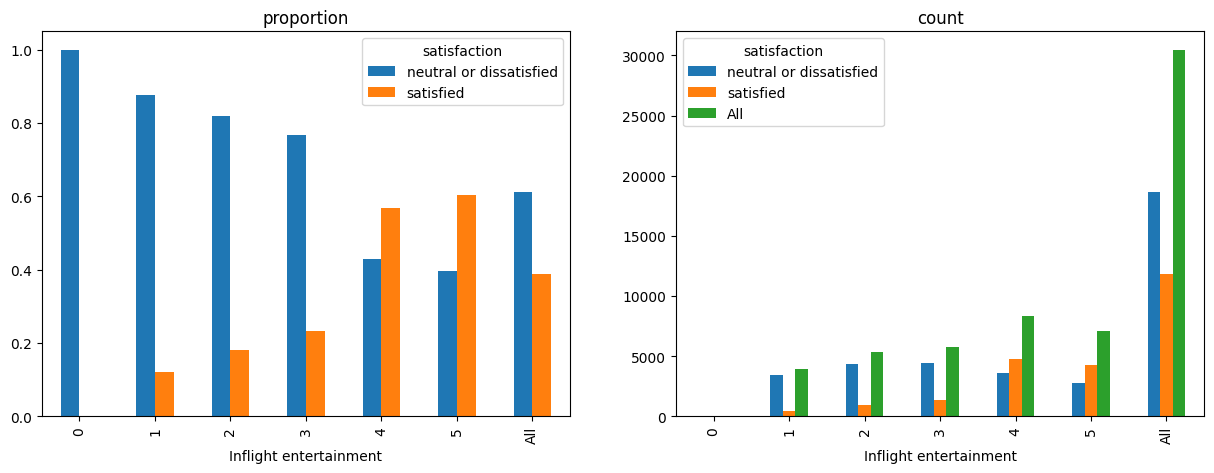

In [15]:
#Inflight entertainment
feat="Inflight entertainment"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

きれいな正の影響力が見られる、4, 5の割合が多い

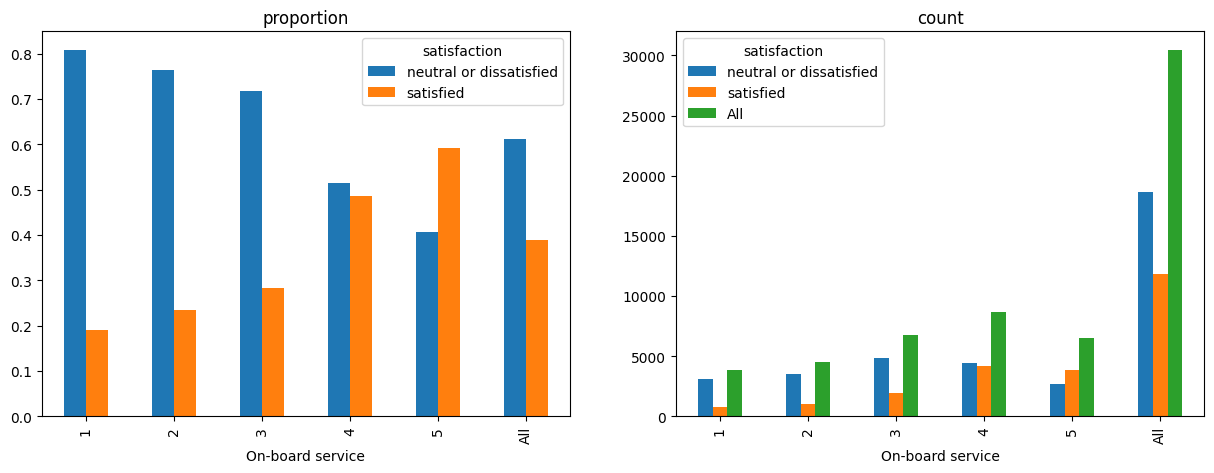

In [17]:
#On-board service
feat="On-board service"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

正の影響力が見られる

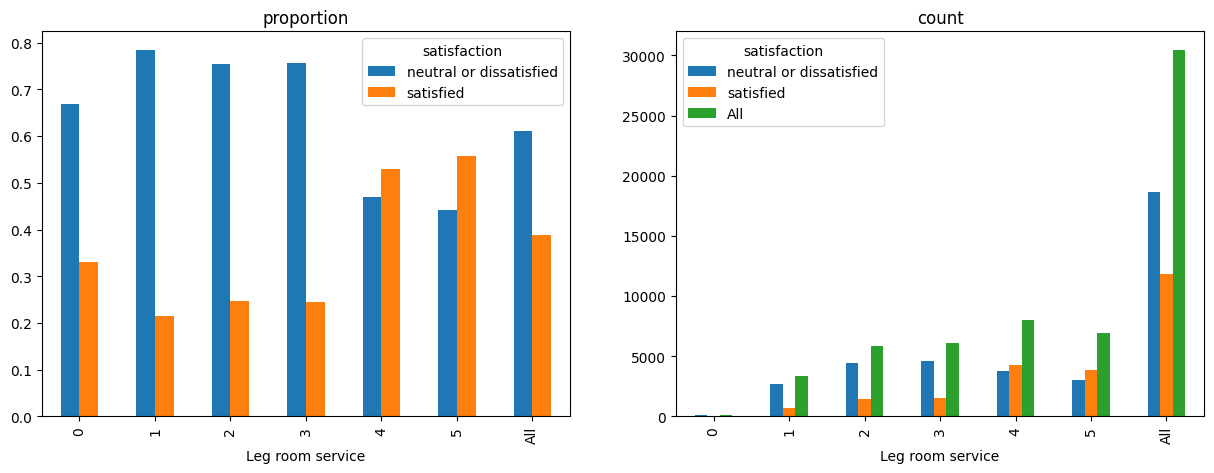

In [19]:
#Leg room service
feat="Leg room service"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

性の影響が見られる

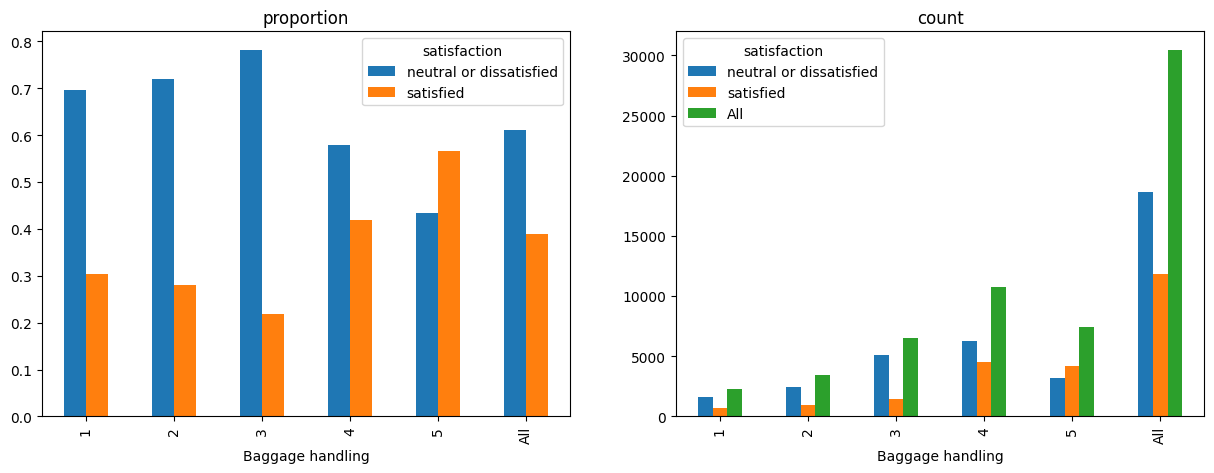

In [20]:
#Baggage handling
feat="Baggage handling"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

若干正の影響

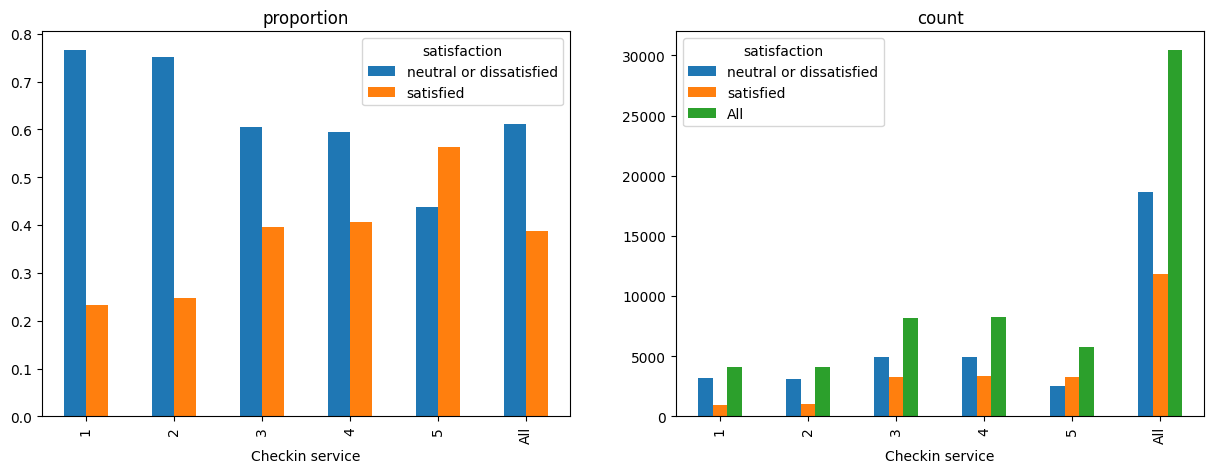

In [22]:
#Checkin service
feat="Checkin service"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

若干正の影響

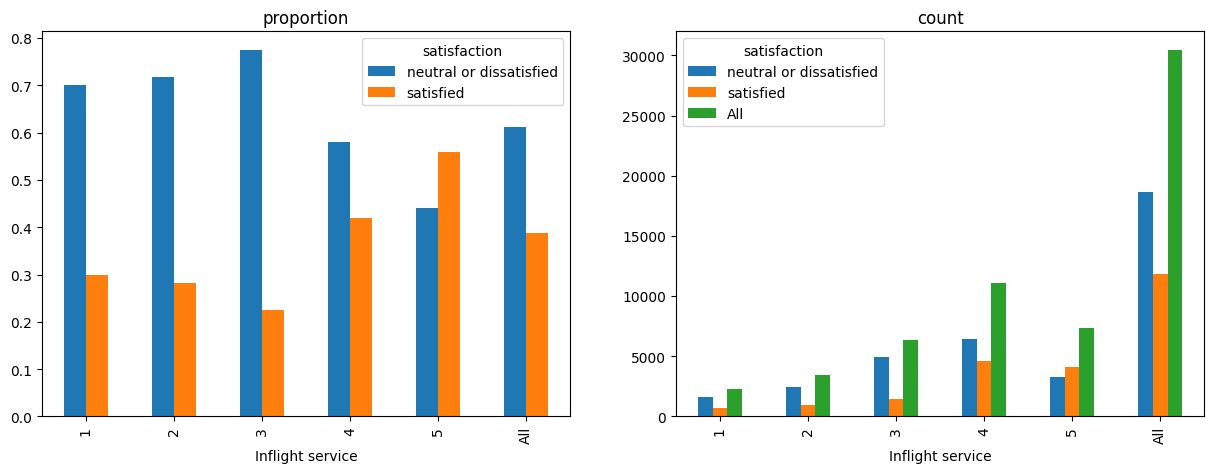

In [24]:
#Inflight service
feat="Inflight service"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

若干正の影響

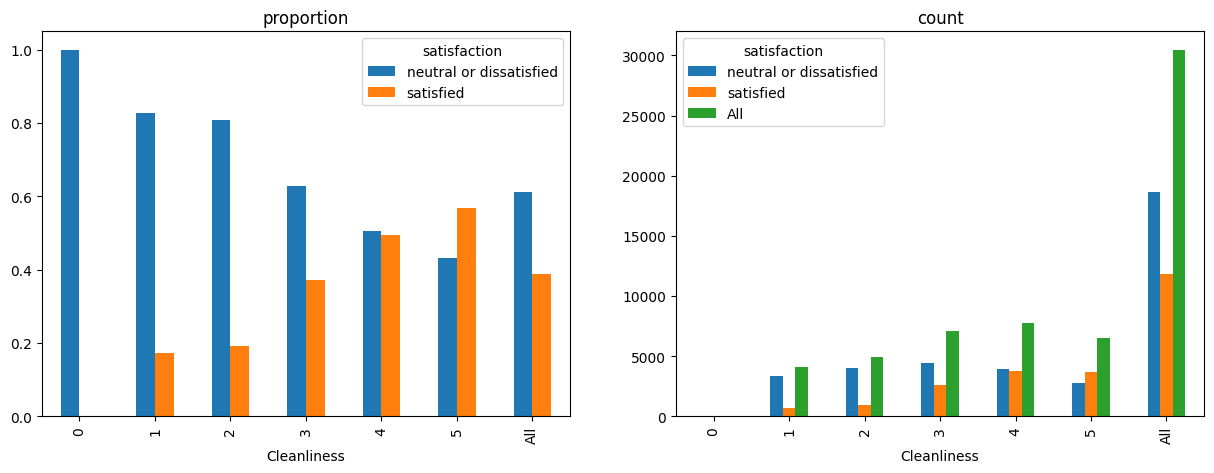

In [26]:
#Cleanliness
feat="Cleanliness"
cross_count = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True)
cross_proportion = pd.crosstab(df[feat],
                    df["satisfaction"], margins=True, normalize="index")

fig = plt.figure(121, figsize=(15,5))
ax_count = fig.add_subplot(122)
ax_proportion = fig.add_subplot(121)

cross_count.plot(kind="bar", ax=ax_count)
ax_count.set_title("count")
cross_proportion.plot(kind="bar", ax=ax_proportion)
ax_proportion.set_title("proportion")

plt.show()

きれいな正の影響が見られる

# 結論
[Departure/Arrival time convenient]を除いて個々の満足度はトータル満足度に対して、性の影響力を持っている。(当然だが)\
その中でも以下の項目が強い影響力を持っていると考えられる\
・Inflight wifi service\
・Online boarding\
・Inflight entertainment


# 各満足度の平均点
各満足度の平均を算出してデータフレームに追加

In [42]:
#各満足度の列名取得
cols_respective_satisfactions = df.columns[7:21]
cols_respective_satisfactions

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [44]:
#各満足度の平均を特徴量として追加
df["mean_satisfactions"] = df[cols_respective_satisfactions].mean(axis=1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,mean_satisfactions
85208,123908,Female,Loyal Customer,69,Personal Travel,Eco,546,2,5,2,...,4,2,4,4,4,2,0,0.0,neutral or dissatisfied,3.500000
31633,107130,Male,Loyal Customer,31,Personal Travel,Eco,842,3,5,3,...,4,3,5,5,4,1,35,16.0,neutral or dissatisfied,2.857143
10425,69734,Female,Loyal Customer,62,Personal Travel,Eco,1372,3,4,2,...,1,2,1,3,1,4,0,0.0,neutral or dissatisfied,2.500000
64557,99343,Female,disloyal Customer,41,Business travel,Eco,1771,3,3,3,...,4,4,2,3,4,2,20,23.0,neutral or dissatisfied,2.857143
41909,59999,Female,Loyal Customer,18,Personal Travel,Eco,937,2,5,2,...,5,2,2,1,1,1,0,0.0,neutral or dissatisfied,2.000000


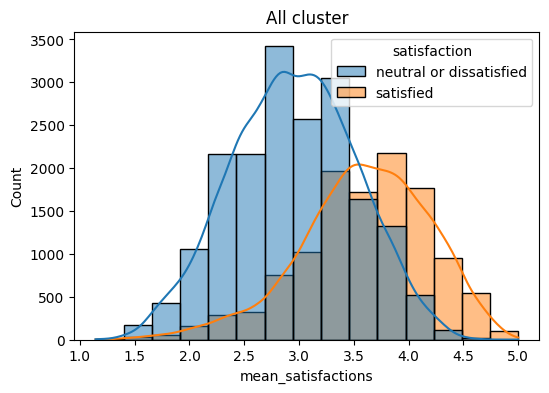

In [51]:
#mean_satisfactions
feat = "mean_satisfactions"
fig = plt.figure(figsize=(6,4))
ax_all = fig.add_subplot(111)

sns.histplot(data=df, x=feat, hue="satisfaction", kde=True, bins=15, ax=ax_all)
ax_all.set_title("All cluster")

plt.show()

予想通り二峰性のヒストグラムになった\
・平均点が低いのにtotalで満足している人\
・平均点が高いのにtotalで満足していない人\
この2つがキーかもしれない